<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created on August 19, 2021 
By Ted Lawless and [Nathan Kelber](http://nkelber.com) for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
For questions/comments/improvements, email nathan.kelber@ithaka.org.<br />
___

# Find all sentences that match a word or phrase

The Research Goal:

>Identify any sentences in a dataset that match a word/phrase and output them to a file.

## Before getting started

This research question will require a Constellate dataset that contains the full-text of the document. You can create these in the [Constellate dataset builder](https://constellate.org/builder/) by selecting "Full text only" from the "Download Availability" filter. 

![The full-text selection in the builder](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/full-text-facet.png)

## Import Libraries

First, we will import Python libraries to help us with our analysis. We will use:

* The defaultdict and Counter libaries to manage our data
* The Pandas library for plotting and outputting our data to CSV
* The [Natural Language Toolkit](https://www.nltk.org/) to parse the raw text into sentences
* The constellate client to retrieve our dataset

In [12]:
from collections import defaultdict, Counter
import pandas as pd
import csv
from nltk.tokenize import sent_tokenize
import constellate

If you run this analysis locally, you may also need to download the NLTK punkt tokenizer using:

```
import nltk
nltk.download('punkt')
```

## Download the dataset and specify the matching text

Download a dataset created in the Constellate application into the notebook environment.

Add the dataset id that you are interested in retreiving as the `dataset_id` variable. This can be found on your [dashboard](https://constellate.org/dataset/dashboard) in the Constellate web application.

If you do not have a dataset, here are two examples you could use:

* `f477f1df-6cd5-c12e-844e-a04128e9b6e5`: All documents from JSTOR published in Proceedings of the American Philosophical Society from 1900 - 1930

* `88a2bfb7-7196-0ca4-d545-d066ae8cc52c`: All documents from JSTOR published in The American Economic Review from 1910 - 1930 and limited to full text availability

In [2]:
# Define the dataset ID
dataset_id = "88a2bfb7-7196-0ca4-d545-d066ae8cc52c"

# Retrieve the dataset using the Constellate Client
# For more information on the client, see https://constellate.org/docs/constellate-client
dataset_file = constellate.get_dataset(dataset_id)

All documents from JSTOR published in The American Economic Review from 1910 - 1930 and limited to full text availability. 3399 documents.
INFO:root:File /Users/nkelber/data/88a2bfb7-7196-0ca4-d545-d066ae8cc52c-sampled-jsonl.jsonl.gz exists. Not re-downloading.


Next, define the `matching_phrase` variable that you want to find in the text of the documents. This can be any string and a case insensitive match will be used. 

In [3]:
matching_phrase = "inflation"

## Tokenize the dataset into sentences

1. Loop through all the documents in the dataset
2. Read the `fullText` field (which is an array of page text) and parse sentences using nltk's sentence parser
3. Check each sentence to see if it contains the matching phrase (case insensitive)
4. Save matches to a Python list
5. Record the following:
    * document identifier
    * publication year
    * the page sequence number where the sentence was found
    * the sentence sequence number within that page
    * the text of the sentence.

In [4]:
# Lower case our matching phrase and strip any whitespace
matching_phrase = matching_phrase.lower().strip()

# Define an empty list to store our matched sentences
matched_sentences = []

# Count our matches
matched = 0

# Count our loop iterations
n = 0

for document in constellate.dataset_reader(dataset_file):
    publication_year = document["publicationYear"]
    for page_sequence, raw_page_text in enumerate(document.get("fullText")):
        # Replace all line breaks with spaces.
        page = " ".join(raw_page_text.split())
        for sentence_sequence, sentence in enumerate(sent_tokenize(page)):
            if matching_phrase in sentence.lower():
                matched_sentences.append((document["id"], publication_year, page_sequence, sentence_sequence, sentence))
                matched += 1
    n += 1
    if (n % 100) == 0:
       print(f"{n} documents scanned", document["id"])

100 documents scanned http://www.jstor.org/stable/1828321
200 documents scanned http://www.jstor.org/stable/1828251
300 documents scanned http://www.jstor.org/stable/1827841
400 documents scanned http://www.jstor.org/stable/1805701
500 documents scanned http://www.jstor.org/stable/1805706
600 documents scanned http://www.jstor.org/stable/1803429
700 documents scanned http://www.jstor.org/stable/1813993
800 documents scanned http://www.jstor.org/stable/1827852
900 documents scanned http://www.jstor.org/stable/1809763
1000 documents scanned http://www.jstor.org/stable/1805415
1100 documents scanned http://www.jstor.org/stable/1814920
1200 documents scanned http://www.jstor.org/stable/1802953
1300 documents scanned http://www.jstor.org/stable/487
1400 documents scanned http://www.jstor.org/stable/1804695
1500 documents scanned http://www.jstor.org/stable/1805024


In [5]:
# Report number of matches
print(f'{len(matched_sentences)} matching sentences found in your dataset.')

# Preview the matched sentences
# ID, year, page sequence, sentence sequence for page, actual matching sentence
list(matched_sentences[:3])

294 matching sentences found in your dataset.


[('http://www.jstor.org/stable/1813978',
  1919,
  15,
  4,
  'Likewise, they are apt to cry out for more money in times of inflation, under a money delusion.'),
 ('http://www.jstor.org/stable/1801787',
  1922,
  1,
  0,
  '154 Reviews and New Books [March necessary allowance for currency inflation; its tendency to ignore earn- ings due to increased war-time effort and diligence; and in general the grave danger that, in future emergencies, producers, seeing no prospect of gain, will relax their efforts.'),
 ('http://www.jstor.org/stable/1828321',
  1913,
  12,
  14,
  'If this revision is prompt and thoroughgoing it should have the effect of checking the present inflationistic tendency, encouraging the import of goods and the export of gold.')]

## Create sentence dataframe

Create a pandas DataFrame from the matched sentences. This makes it convenient to output as a CSV or analyze further.

In [6]:
sentence_df = pd.DataFrame(matched_sentences, columns=["id", "publication_year", "page_seq", "sentence_seq", "text"])

In [7]:
sentence_df.head()

,id,publication_year,page_seq,sentence_seq,text
0,http://www.jstor.org/stable/1813978,1919,15,4,"Likewise, they are apt to cry out for more mon..."
1,http://www.jstor.org/stable/1801787,1922,1,0,154 Reviews and New Books [March necessary all...
2,http://www.jstor.org/stable/1828321,1913,12,14,If this revision is prompt and thoroughgoing i...
3,http://www.jstor.org/stable/1828321,1913,12,15,Quite irrespective of the merits of tariff rev...
4,http://www.jstor.org/stable/1828321,1913,13,2,"It would not, lhowever, be surprising if in ot..."


## Plot matching sentences over time
Visualize the number of matches grouped by the year they occurred in a bar chart.

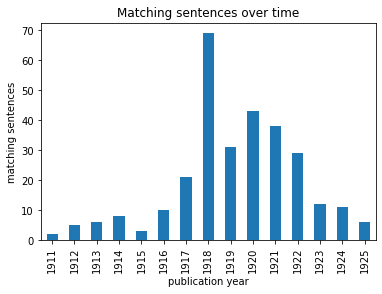

In [8]:
sentence_df.groupby("publication_year").size()\
  .plot(kind="bar", title="Matching sentences over time", xlabel="publication year", ylabel="matching sentences");

## Output a csv file with the matching sentences


In [14]:
sent_file = f"../data/{dataset_id}-sentences.csv"

sentence_df.to_csv(sent_file, index=False)